In [1]:
using Oscar

  ___   ____   ____    _    ____
 / _ \ / ___| / ___|  / \  |  _ \   |  Combining ANTIC, GAP, Polymake, Singular
| | | |\___ \| |     / _ \ | |_) |  |  Type "?Oscar" for more information
| |_| | ___) | |___ / ___ \|  _ <   |  Manual: https://docs.oscar-system.org
 \___/ |____/ \____/_/   \_\_| \_\  |  Version 1.2.2


In [10]:
using Plots

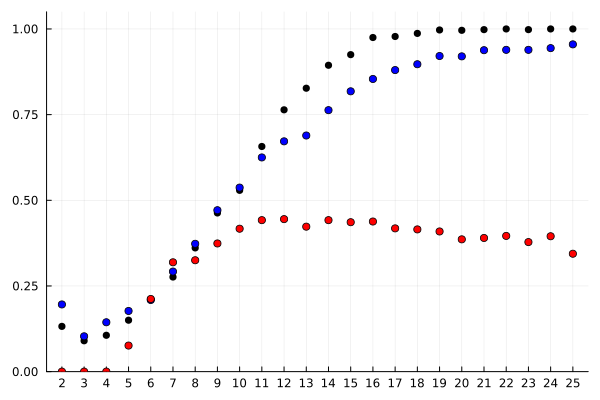

"/export/home/taemmric/PlotGG.pdf"

In [18]:
function partgalois(k,nmax,pind)
    PartFullGG=[]
    for n in 2:nmax
        M=matrix_space(QQ,n,n)
        count=0
        A=M()
        p=prob(pind,n)
        for l=1:k
            for i=1:n
                for j=1:n
                    if (rand()<p)
                        A[i,j]=1
                    else
                        A[i,j]=0
                    end
                end
            end
            Char=charpoly(A)
            if(is_irreducible(Char))
                G,C=galois_group(Char)
                if(order(G)==factorial(big(n)))
                    count=count+1;
                end
            end
        end
        a=count/k
        push!(PartFullGG,a)
    end
    return PartFullGG
end



function prob(i,n)
    if i==1
        return 1/2
    end
    if i==2
        return 2*log(n)/n
    end
    if i==3
        return 4/n
    end
end


y1=partgalois(1000,25,1)

y2=partgalois(1000,25,2)

y3=partgalois(1000,25,3)

x=2:25


Plot=plot(x,y1,
    seriestype=:scatter;
    xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:black
)

#p=4/n, k=1000

plot!(x,y2,
    seriestype=:scatter;
    xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:blue
)

#p=2*ln(n)/n, k=1000
plot!(x,y3,
seriestype=:scatter;
xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:red
)
display(Plot)
savefig("PlotGG.pdf")

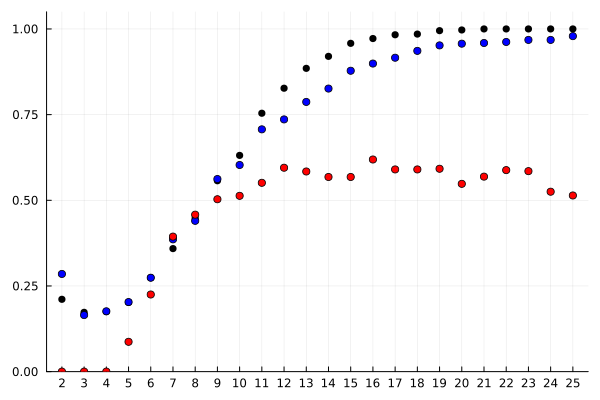

"/export/home/taemmric/PlotIrred.pdf"

In [17]:
function partirred(k,nmax,pind)
    PartFullGG=[]
    for n in 2:nmax
        M=matrix_space(QQ,n,n)
        count=0
        A=M()
        p=prob(pind,n)
        for l=1:k
            for i=1:n
                for j=i:n
                    if (rand()<p)
                        A[i,j]=1
                        A[j,i]=1
                    else
                        A[i,j]=0
                        A[j,i]=0
                    end
                end
            end
            Char=charpoly(A)
            if(is_irreducible(Char))
                count=count+1
            end
        end
        a=count/k
        push!(PartFullGG,a)
    end
    return PartFullGG
end



function prob(i,n)
    if i==1
        return 1/2
    end
    if i==2
        return 2*log(n)/n
    end
    if i==3
        return 4/n
    end
end


y1=partirred(1000,25,1)

y2=partirred(1000,25,2)

y3=partirred(1000,25,3)

x=2:25


Plot=plot(x,y1,
    seriestype=:scatter;
    xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:black
)

#p=4/n, k=1000

plot!(x,y2,
    seriestype=:scatter;
    xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:blue
)

#p=2*ln(n)/n, k=1000
plot!(x,y3,
seriestype=:scatter;
xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:red
)

display(Plot)
savefig("PlotIrred.pdf")